In [37]:
import pandas as pd
import numpy as np
from scipy.ndimage import sobel
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from scipy.fft import fft, fftfreq

In [20]:
data=pd.read_csv('Section 3 data.csv')
df=pd.DataFrame(data)
df.head()
df.columns = [f"{i+1}" for i in range(data.shape[1])]
df.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
0,3.264011,3.331538,3.254502,2.816155,3.175651,2.995944,2.963060,3.618391,3.015709,2.849339,...,3.220985,3.110368,3.108212,3.489397,2.960912,3.306820,3.417709,3.524081,3.141618,3.361223
1,3.170393,3.238018,3.185075,2.759907,3.089149,2.929650,2.906405,3.522798,2.967472,2.804227,...,3.139422,3.024213,3.043078,3.437473,2.904058,3.234052,3.370602,3.421170,3.069848,3.288135
2,3.073419,3.143099,3.082911,2.682017,2.991492,2.867536,2.858474,3.411356,2.903908,2.744555,...,3.046735,2.941585,2.972789,3.329692,2.832499,3.140333,3.262105,3.302803,2.990968,3.170215
3,2.976448,3.048187,2.980743,2.604133,2.893835,2.805416,2.810538,3.299923,2.840350,2.684883,...,2.954042,2.858966,2.902495,3.221916,2.760934,3.046621,3.153600,3.184436,2.912082,3.052295
4,2.879478,2.953276,2.878582,2.526245,2.796179,2.743304,2.762607,3.188490,2.776787,2.625209,...,2.861355,2.776344,2.832206,3.114133,2.689374,2.952907,3.045095,3.066068,2.833202,2.934375


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       4653 non-null   float64
 1   2       4653 non-null   float64
 2   3       4653 non-null   float64
 3   4       4653 non-null   float64
 4   5       4653 non-null   float64
 5   6       4653 non-null   float64
 6   7       4653 non-null   float64
 7   8       4653 non-null   float64
 8   9       4653 non-null   float64
 9   10      4653 non-null   float64
 10  11      4653 non-null   float64
 11  12      4653 non-null   float64
 12  13      4653 non-null   float64
 13  14      4653 non-null   float64
 14  15      4653 non-null   float64
 15  16      4653 non-null   float64
 16  17      4653 non-null   float64
 17  18      4653 non-null   float64
 18  19      4653 non-null   float64
 19  20      4653 non-null   float64
 20  21      4653 non-null   float64
 21  22      4653 non-null   float64
 22  

In [23]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,...,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,4.752868,4.747885,4.829078,4.897856,4.950687,4.636541,4.686629,4.816176,4.563740,4.609075,...,4.858223,5.031630,4.771273,4.782622,4.844559,4.657977,4.695436,4.765666,4.817903,4.684409
std,6.090655,6.087824,6.235408,6.312660,7.158552,5.529075,5.977091,7.142968,5.366797,5.395040,...,6.198837,7.506829,5.899376,5.691797,6.242591,5.510348,5.348646,5.934935,6.431366,5.816387
min,0.544619,0.560788,0.552840,0.505436,0.530923,0.565210,0.588241,0.549183,0.592048,0.523508,...,0.524439,0.554485,0.581016,0.482178,0.543876,0.455419,0.528574,0.507065,0.579684,0.516037
25%,1.385173,1.342741,1.414165,1.398196,1.404133,1.399881,1.351882,1.279366,1.352066,1.263204,...,1.396708,1.453254,1.482301,1.471598,1.467277,1.443125,1.460243,1.424252,1.484492,1.400726
50%,2.402526,2.351952,2.432117,2.381935,2.362599,2.466529,2.261786,2.145211,2.337082,2.316049,...,2.572299,2.451007,2.537028,2.566216,2.549755,2.436221,2.569362,2.495766,2.640467,2.547637
75%,5.200344,5.236828,5.148625,5.367506,5.336435,5.504987,5.396548,5.361143,5.593193,5.777591,...,5.207477,5.499607,5.548147,5.589947,5.589694,5.531091,5.752094,5.920429,5.699529,5.355574
max,70.807121,55.407410,47.104305,48.785011,80.458168,45.803200,50.664410,78.219696,45.119656,40.276398,...,51.160069,87.792076,64.128075,42.107475,69.806725,41.938885,39.580841,53.038849,81.971535,62.708450


Signal Intensity Patterns by Depth:
Depth Range 0-1000 meters: The signal intensity is relatively uniform and low in this range, indicating stable conditions or less activity. This could suggest less flow or fewer dynamic events in this shallow region.


Depth Range 1000-3000 meters: You can observe periodic brighter regions, which may suggest higher levels of activity or fluid flow in these depths. These brighter areas indicate higher acoustic events or stronger signal detection by the DAS system.In the 1000-3000 meter range, the regular brightening and darkening across time could indicate periodic changes in flow conditions or mechanical processes. This could be related to pulsating flow or mechanical oscillations inside the pipe.
The periodicity in these signals could be further explored by examining if there's a specific frequency associated with the changes, potentially indicating operational cycles or equipment-related behavior.


Depth Range 3000-4000 meters: There is an even more distinct signal variation here, with scattered bright spots, which could indicate areas of increased flow or pressure fluctuations, perhaps indicating changes in the material or structure of the pipe.


Depth Range 4000-5000 meters: Similar to the first depth range, this lower section shows less signal intensity, suggesting reduced activity or lower sensitivity at this depth.




The lower depths (4000-5000 meters and above 0-1000 meters) seem to show less signal variation, while mid-range depths (1000-4000 meters) are more active, indicating that the middle portion of the pipe may be experiencing more dynamic conditions.
This could imply that the pipe or fluid characteristics change in the mid-range, or that external forces (such as geological conditions) are affecting the mid-depths more than the shallower or deeper parts.

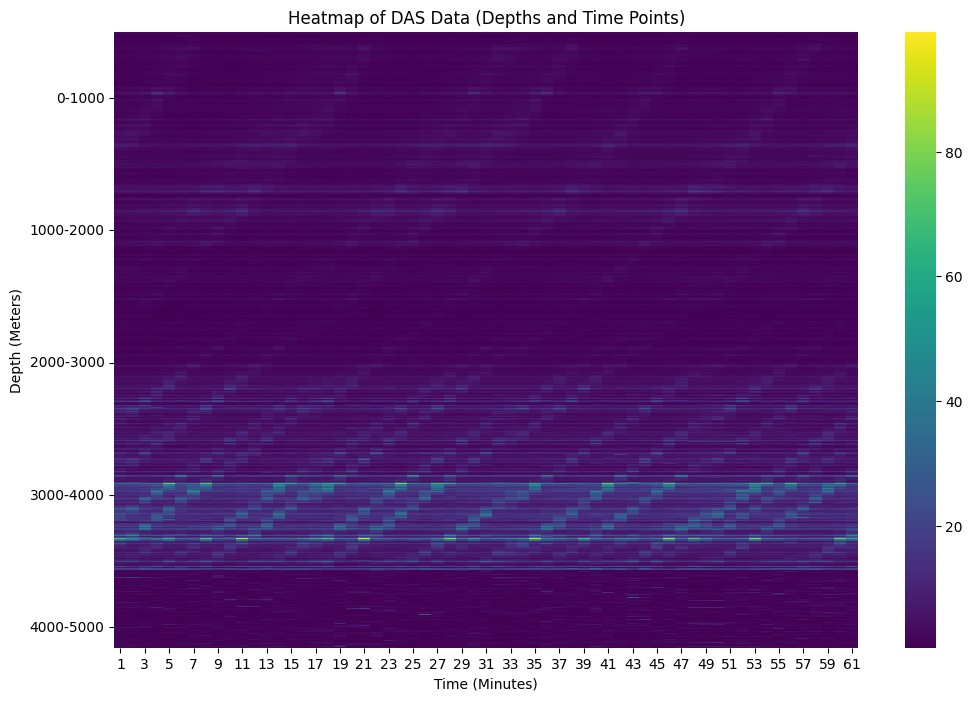

In [34]:
import numpy as np

# Assuming you have depth values as rows, calculate number of rows corresponding to each depth range
depth_intervals = 1000  # Define interval range
max_depth =4653  # Assuming each row represents 1 meter
depth_labels = [f"{i}-{i+depth_intervals}" for i in range(0, max_depth, depth_intervals)]

# Create ticks at the middle of each interval
ticks = np.arange(depth_intervals // 2, 4653, depth_intervals)

# Plot heatmap with customized y-axis ticks and labels
plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[:max_depth, :100], cmap="viridis")  # Adjust the max_depth as needed
plt.title("Heatmap of DAS Data (Depths and Time Points)")
plt.xlabel("Time (Minutes)")
plt.ylabel("Depth (Meters)")

# Set custom depth ticks and labels
plt.yticks(ticks, labels=depth_labels)
plt.show()



Steady Fluid Flow: The strong low-frequency component could indicate steady fluid flow inside the pipe. The absence of higher frequencies suggests that there are no turbulent or rapidly changing flow conditions.
Gradual Pressure Changes: The low-frequency component could also represent slow pressure changes within the pipe. Since there is no notable high-frequency activity, it is unlikely that there are frequent mechanical or operational events affecting the system in this depth range.

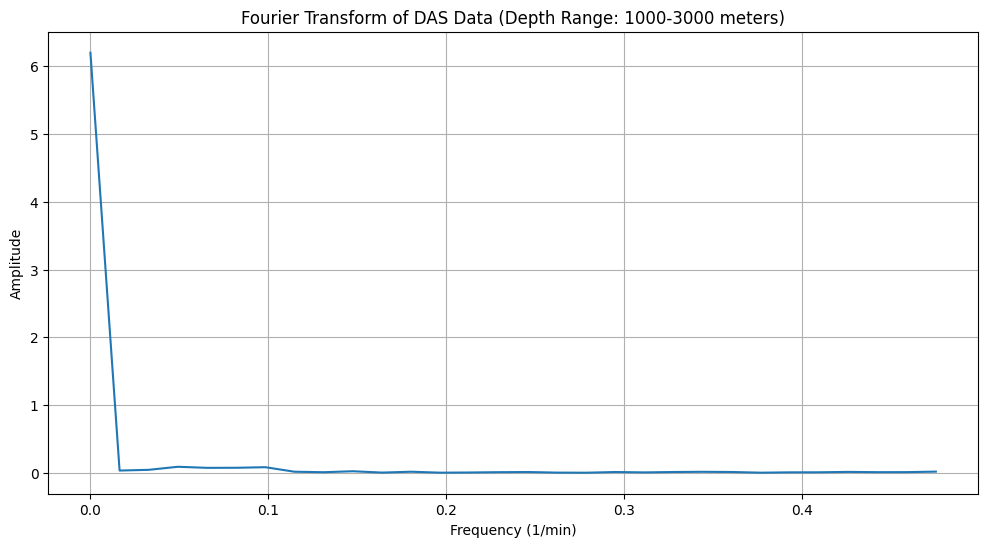

In [36]:


# Extract data from depths between 1000 and 3000 meters (assuming rows correspond to depths)
depth_start = 1000
depth_end = 3000
selected_data = df.iloc[depth_start:depth_end, :].mean(axis=0)  # Taking the mean across selected depths

# Number of time points (minutes)
n = len(selected_data)

# Time step between measurements (1 minute)
timestep = 1

# Perform Fourier Transform
yf = fft(selected_data)
xf = fftfreq(n, timestep)[:n//2]

# Plot the Fourier Transform to analyze frequency components
plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0/n * np.abs(yf[0:n//2]))
plt.title("Fourier Transform of DAS Data (Depth Range: 1000-3000 meters)")
plt.xlabel("Frequency (1/min)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


Canny Edge Detection: Identify edges in the data (significant changes in signal intensity over time).
Gaussian Smoothing reduces noise, ensuring only significant edges are detected.
Gradient Calculation helps identify potential edges by measuring the intensity change.
Non-Maximum Suppression refines the edges, making them thinner and more accurate.
Double Thresholding ensures that only significant edges are detected, while ignoring irrelevant noise or weak signals.
Edge Tracking by Hysteresis finalizes the edges by connecting weak and strong edges for a continuous boundary.
Canny Edge Detection is robust because it uses both gradient information and thresholding to filter out unnecessary details while preserving important edges

Detected Edges:

The bright white lines represent areas where significant changes in signal intensity occur over time and depth.
These edges may correspond to events such as flow disruptions, pressure changes, or material changes within the pipe.
Higher Activity in Certain Depth Ranges:

We can see that more edges are detected between depths of 3000-4000 meters, suggesting higher levels of signal variation in that depth range.
The regions around 2000 meters and above 4000 meters show fewer edges, indicating more stable or less dynamic conditions.
Periodic Features:

There are horizontal lines of edges that suggest periodic or consistent changes at particular depths over time.
These periodic signals may represent flow or operational patterns, potentially indicating a cyclic behavior in the flow dynamics.

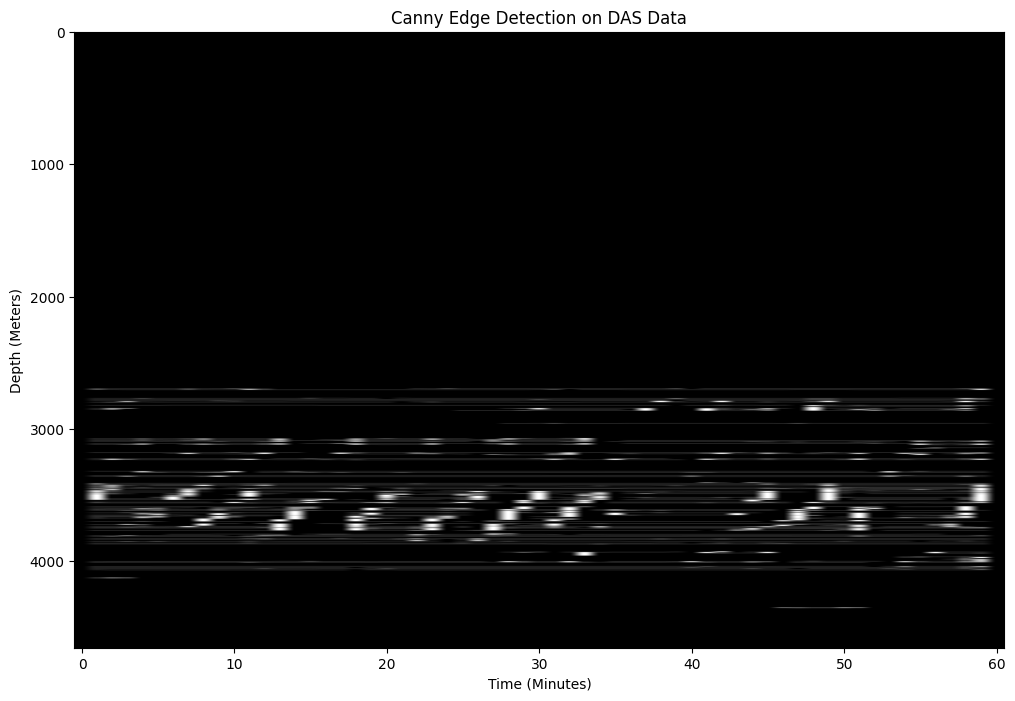

In [38]:
from skimage import feature
import cv2

# Normalize the data to make edge detection easier
normalized_data = (df - df.min()) / (df.max() - df.min())  # Normalize between 0 and 1

# Convert the normalized dataframe to a numpy array for processing
data_np = normalized_data.values

# Apply Canny Edge Detection algorithm
edges_canny = feature.canny(data_np, sigma=2)  # Sigma defines the sensitivity of the detector

# Visualize the result of the Canny Edge Detection
plt.figure(figsize=(12, 8))
plt.imshow(edges_canny, cmap='gray', aspect='auto')
plt.title("Canny Edge Detection on DAS Data")
plt.xlabel("Time (Minutes)")
plt.ylabel("Depth (Meters)")
plt.show()


The lines are mostly concentrated between 3000 and 4000 meters, indicating that this depth range experiences more structured changes, possibly related to fluid flow or pressure.
The lines appear in segments, which may suggest periodic or intermittent events happening over time.
Insights:
Structured Changes: The detected straight lines likely correspond to events where signal intensity changes steadily over time. This could indicate consistent flow patterns or mechanical processes within the pipe at specific depths.
Temporal Gaps: The lines are not continuous, which may indicate that there are interruptions or pauses in the activity over time.

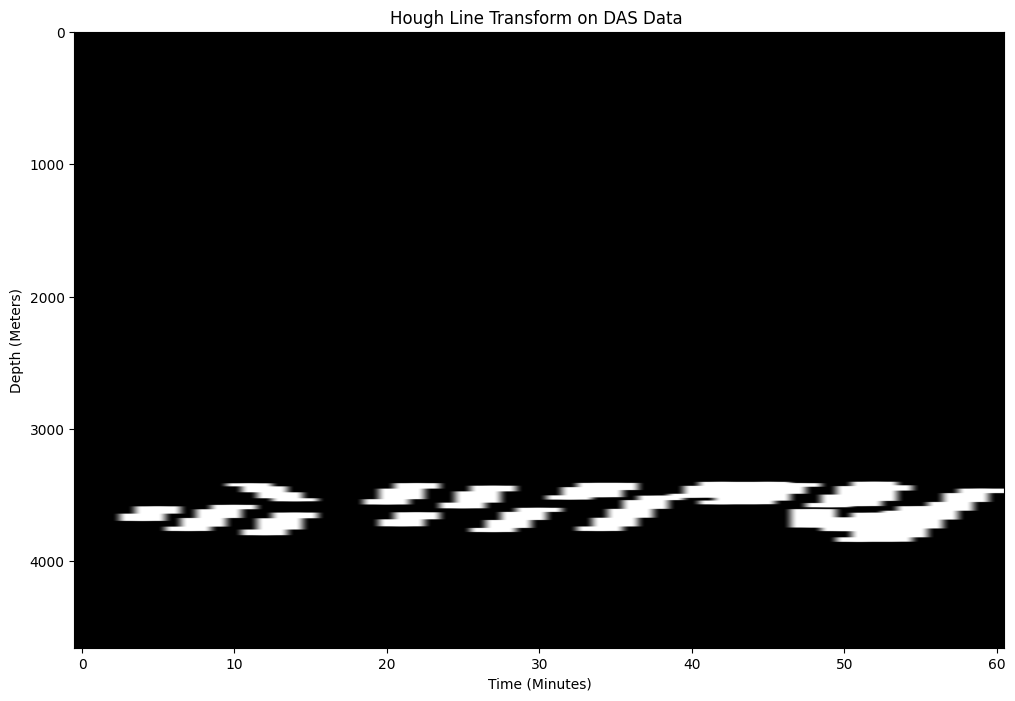

In [53]:
# Convert the boolean edges_canny array to uint8 format for OpenCV
edges_canny_uint8 = (edges_canny * 255).astype(np.uint8)

# Recreate the blank image for the Hough lines
line_image = np.zeros_like(edges_canny_uint8)

# Apply Hough Line Transform again and draw the lines
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), 255, 2)

# Plot the result with detected lines
plt.figure(figsize=(12, 8))
plt.imshow(line_image, cmap='gray', aspect='auto')
plt.title("Hough Line Transform on DAS Data ")
plt.xlabel("Time (Minutes)")
plt.ylabel("Depth (Meters)")
plt.show()



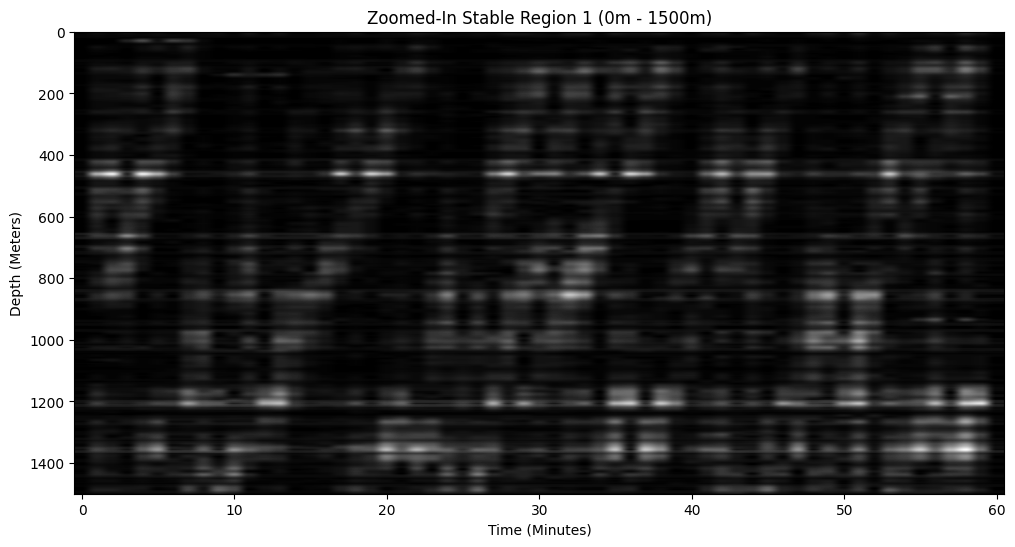

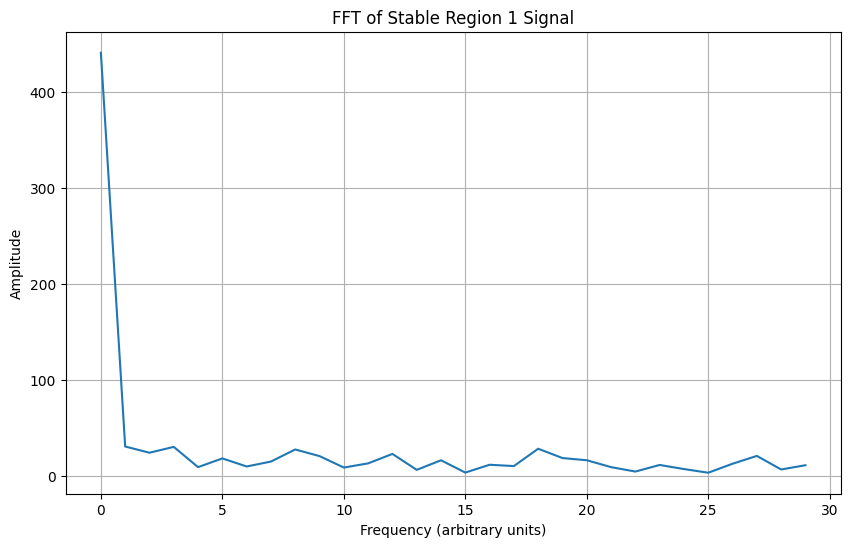

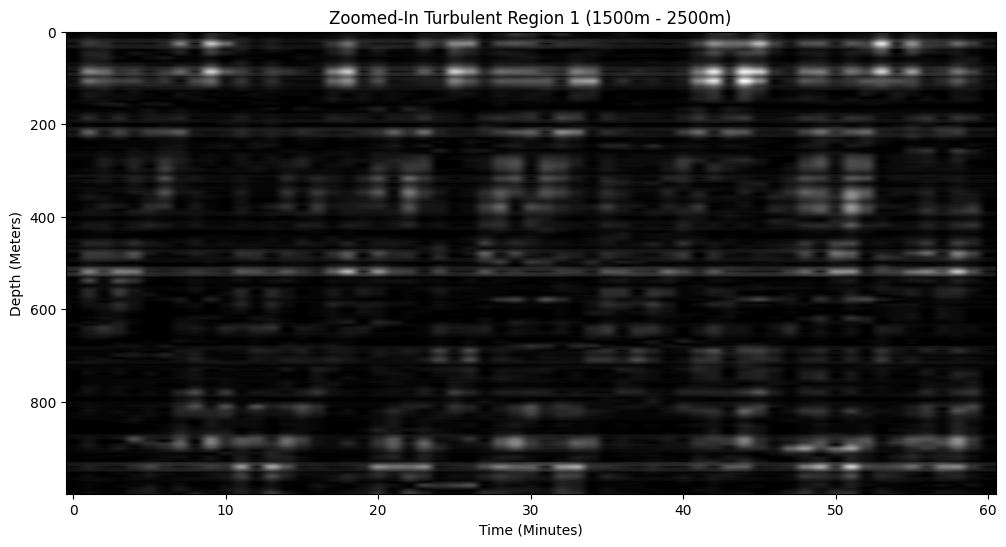

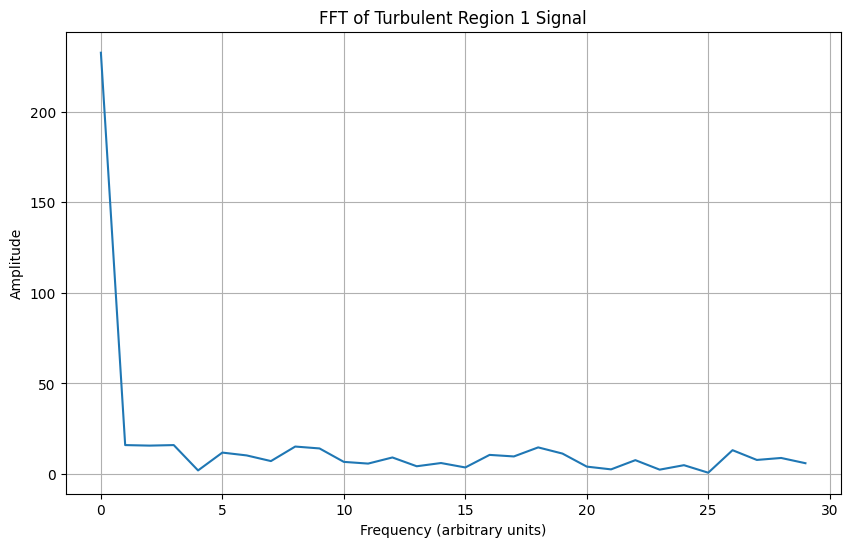

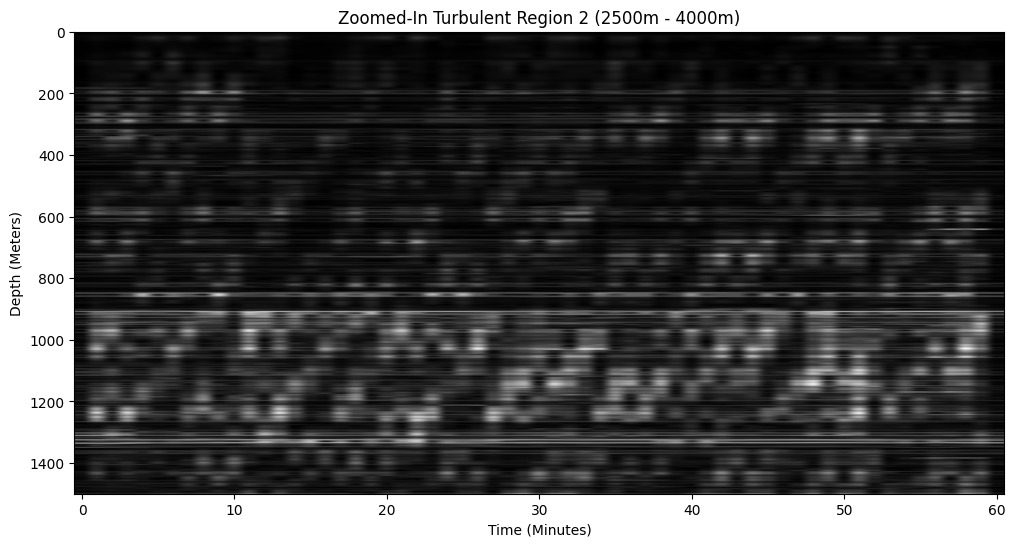

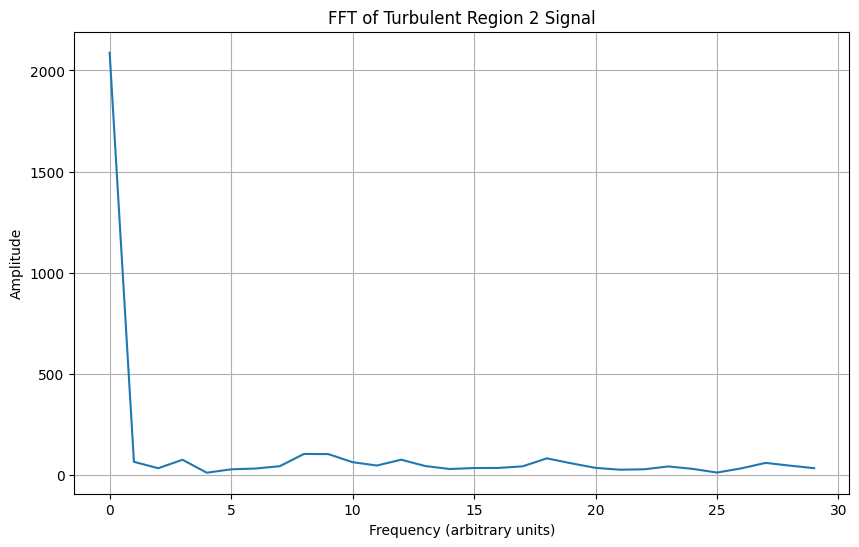

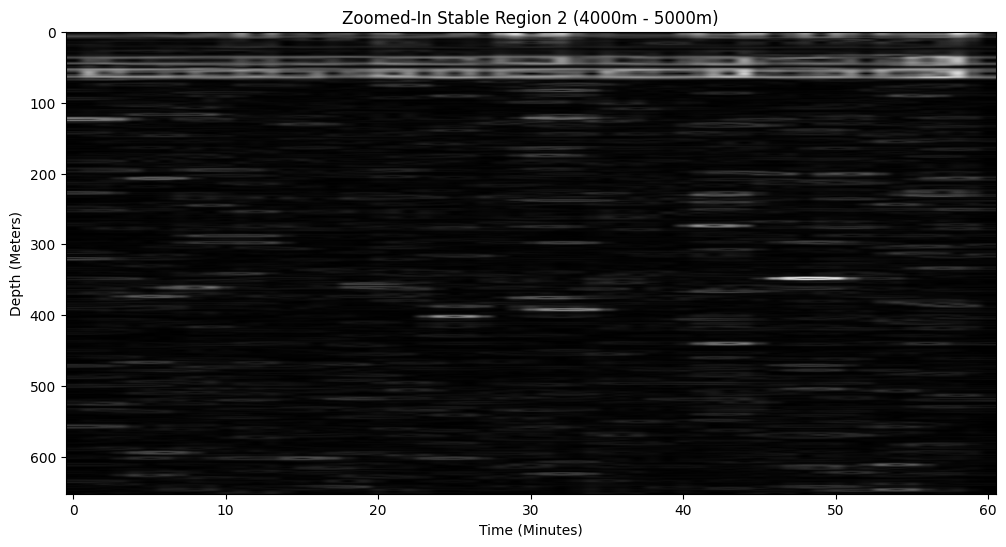

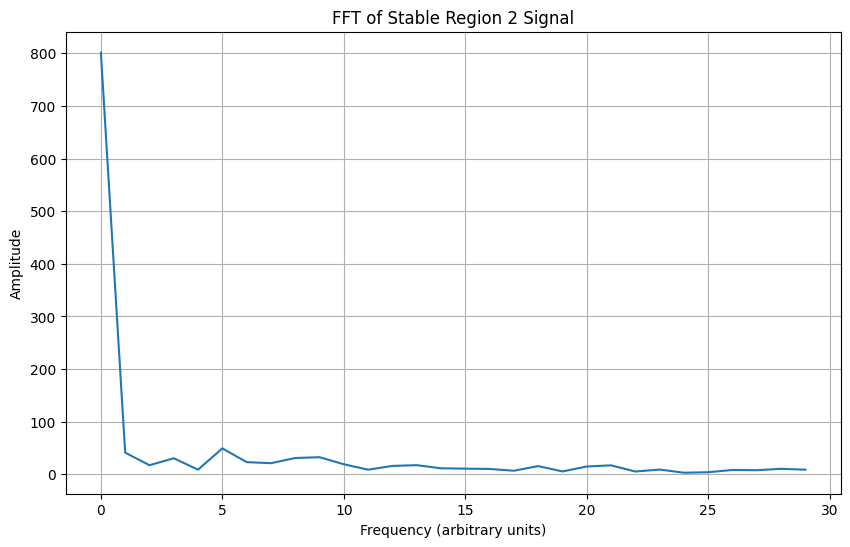

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Ensure the normalized data is converted to a NumPy array if it's a DataFrame
normalized_data_np = normalized_data.to_numpy() if hasattr(normalized_data, 'to_numpy') else normalized_data

# Sobel Filter Process and Normalizing the Data
sobelx = cv2.Sobel(normalized_data_np, cv2.CV_64F, 1, 0, ksize=5)  # x-direction
sobely = cv2.Sobel(normalized_data_np, cv2.CV_64F, 0, 1, ksize=5)  # y-direction

# Combine Sobel gradients
sobel_combined = np.sqrt(sobelx ** 2 + sobely ** 2)

# Normalize the combined Sobel result to 0-255
sobel_combined_normalized = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Define depth ranges of interest
depth_ranges = {
    'Stable Region 1': (0, 1500),
    'Turbulent Region 1': (1500, 2500),
    'Turbulent Region 2': (2500, 4000),
    'Stable Region 2': (4000, 5000)
}

# Loop through the specified depth ranges
for region_name, (start_depth, end_depth) in depth_ranges.items():
    # Extract the region data
    region_data = sobel_combined_normalized[start_depth:end_depth, :]

    # Plotting the specific region
    plt.figure(figsize=(12, 6))
    plt.imshow(region_data, cmap='gray', aspect='auto')
    plt.title(f'Zoomed-In {region_name} ({start_depth}m - {end_depth}m)')
    plt.xlabel('Time (Minutes)')
    plt.ylabel('Depth (Meters)')
    plt.show()

    # Fourier Transform Analysis on the specific region
    # Taking the average of the region along the depth axis to create a time series
    region_avg_signal = region_data.mean(axis=0)

    # Compute the Fourier Transform
    region_fft = np.abs(fft(region_avg_signal))

    # Plotting the FFT result for the specific region
    plt.figure(figsize=(10, 6))
    plt.plot(region_fft[:len(region_fft)//2])  # Plotting half of the FFT (positive frequencies)
    plt.title(f'FFT of {region_name} Signal')
    plt.xlabel('Frequency (arbitrary units)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()



Comparison Between Algorithms:
Canny Edge Detection:

Provides a clean, sharp edge detection by focusing on local changes in intensity.
It is sensitive to noise, but effective for detecting distinct edge transitions.
Hough Line Transform:

Detects structured, linear changes over time and depth.
Works well when the goal is to find consistent, straight-line features (e.g., periodic events or mechanical behaviors).
Sobel Filtering:

Highlights both vertical and horizontal intensity gradients.
Provides a more continuous representation of edges compared to Canny, capturing gradual changes in signal intensity.

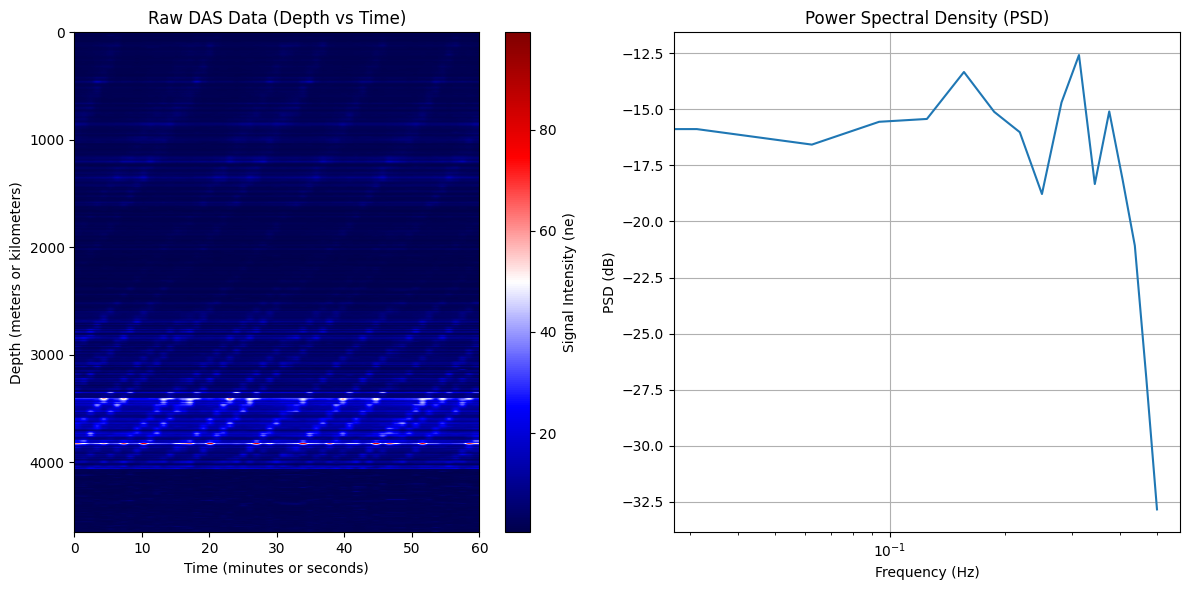

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Assuming your DataFrame is loaded and named 'df'

# Extract the data from the DataFrame
time = np.arange(df.shape[1])  # Assuming columns represent time points (in minutes or seconds)
depth = np.arange(df.shape[0])  # Assuming rows represent depth (in meters or kilometers)
signal = df.to_numpy()  # Convert the DataFrame to a NumPy array

# Heatmap plot (Depth vs Time)
plt.figure(figsize=(12, 6))

# Plot the heatmap of the DAS signal (Depth vs Time)
plt.subplot(1, 2, 1)
plt.imshow(signal, aspect='auto', cmap='seismic', extent=[time.min(), time.max(), depth.max(), depth.min()])
plt.colorbar(label='Signal Intensity (ne)')
plt.title('Raw DAS Data (Depth vs Time)')
plt.xlabel('Time (minutes or seconds)')
plt.ylabel('Depth (meters or kilometers)')

# Power Spectral Density (PSD) plot using Welch's method
# Average the signal across depth (rows) to create a 1D time series
avg_signal_over_depth = signal.mean(axis=0)

# Compute the PSD using the Welch method
fs = 1  # Assuming the time resolution is 1 unit (adjust this to match your real data time resolution)
frequencies, psd = welch(avg_signal_over_depth, fs=fs, nperseg=32)

# Plot PSD (Frequency vs Power)
plt.subplot(1, 2, 2)
plt.plot(frequencies, 10 * np.log10(psd))
plt.xscale('log')
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.grid(True)

# Show the combined figure
plt.tight_layout()
plt.show()


Explanation:
Signal Simulation: The function generate_signal(t) simulates a new signal with a periodic sine wave and some random noise added to it. This simulates real-world signal data that changes over time.
Plotly Setup: The chart is initialized with the first batch of signal data. The Plotly figure is interactive by default (you can zoom in, pan, etc.).
Real-Time Updates: The for loop simulates new data arriving in real time. Every second, the signal is updated, and the plot is refreshed to show the latest data.
Features of the Interactive Chart:
Zooming: You can zoom in on the chart by dragging with your mouse.
Panning: You can pan the chart by clicking and dragging the background.
Dynamic Updates: The plot will update every second to show the new signal data, simulating a real-time signal feed.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axes\_axes.py:8089: RuntimeWarning:

divide by zero encountered in log10



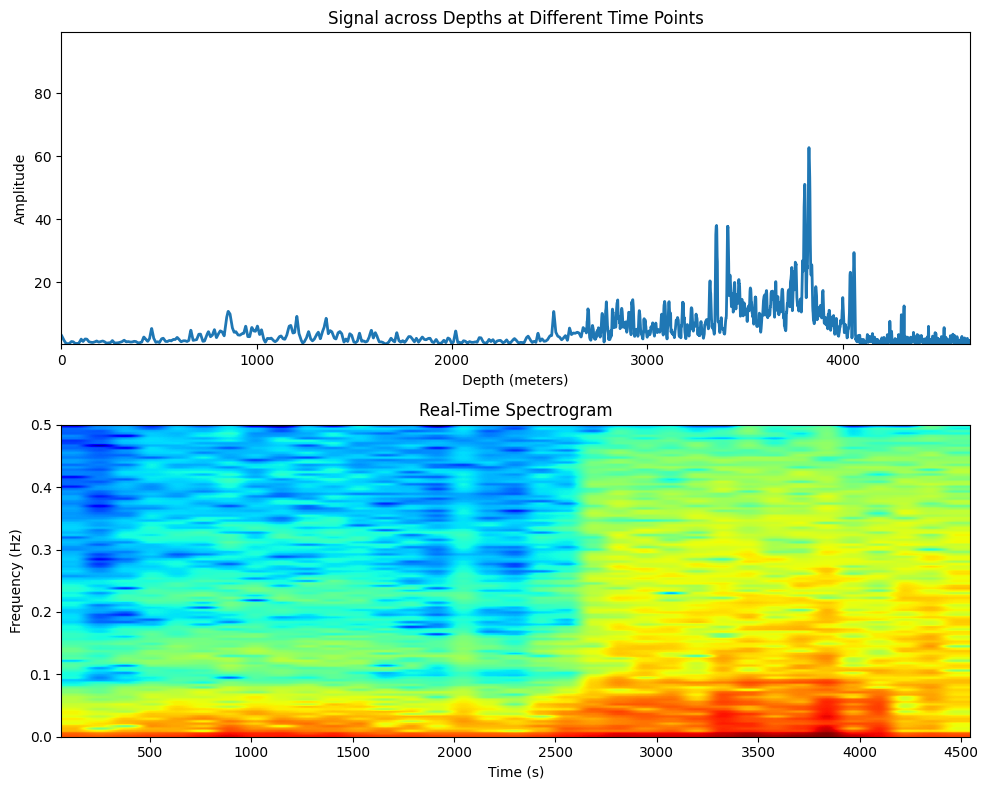

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy import signal

# Assuming 'df' is your DataFrame with 4653 rows (depth) and 61 columns (time)
# Time axis and Sampling frequency based on df's structure
fs = 1  # Assuming each column represents 1 time point (e.g., 1 minute or 1 second)
t = np.arange(df.shape[1])  # Time vector based on the number of columns (e.g., 61 time points)

# Convert df to a NumPy array for signal processing
signal_data = df.to_numpy()

# Set up the figure and axes for the animation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Initial plot for the depth-domain signal (not time, since we have 4653 depth values)
line, = ax1.plot([], [], lw=2)
ax1.set_xlim(0, df.shape[0])  # Depth axis
ax1.set_ylim(np.min(signal_data), np.max(signal_data))  # Adjust y-limits based on data
ax1.set_xlabel('Depth (meters)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Signal across Depths at Different Time Points')

# Plot for the spectrogram
Pxx, freqs, bins, im = ax2.specgram(np.zeros_like(signal_data[:, 0]), NFFT=256, Fs=fs, noverlap=128, cmap='jet')
ax2.set_ylim(0, fs / 2)  # Show frequencies up to Nyquist (fs/2)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_title('Real-Time Spectrogram')

# Update function for the animation
def update(frame):
    # Get the signal for this time point (one column of the DataFrame, representing all depths at a given time)
    new_signal = signal_data[:, frame]  # Take one column (time point) at a time

    # Update the depth-domain plot (plot the signal across depths at a given time point)
    line.set_data(np.arange(df.shape[0]), new_signal)  # Depth on x-axis, signal on y-axis
    
    # Update the spectrogram with the new signal
    ax2.cla()  # Clear the old spectrogram
    ax2.specgram(new_signal, NFFT=256, Fs=fs, noverlap=128, cmap='jet')
    ax2.set_ylim(0, fs / 2)
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Frequency (Hz)')
    ax2.set_title('Real-Time Spectrogram')
    
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=df.shape[1], interval=100, blit=False)

# Save the animation as a GIF
ani.save('real_time_signal_animation.gif', writer='pillow')

# Show the animation
plt.tight_layout()
plt.show()


